In [22]:
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 15
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
# %matplotlib widget
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

from matplotlib.colors import LinearSegmentedColormap


import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
    
    
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"

path_figs = os.getcwd() +"\\..\\Figures\\" 

saveFigures is set to: True
Done loading packages


In [23]:
omdf = pd.read_excel(rootdir_data+'Omikron.xlsx')
omdf['Dato'] = pd.to_datetime(omdf['Dato'])
omdf['Ratio'] = omdf['AntalOmikron']/omdf['AntalTest']
omdf['Perc'] = 100 * omdf['AntalOmikron']/omdf['AntalTest']


In [24]:
omdf

,Dato,AntalTest,AntalOmikron,Ratio,Perc
0,2021-11-24,3711.0,1.0,0.000269,0.026947
1,2021-11-25,3878.0,2.0,0.000516,0.051573
2,2021-11-26,3987.0,6.0,0.001505,0.150489
3,2021-11-27,3919.0,3.0,0.000766,0.076550
4,2021-11-28,3835.0,11.0,0.002868,0.286832
5,2021-11-29,4803.0,12.0,0.002498,0.249844
6,2021-11-30,5181.0,24.0,0.004632,0.463231
7,2021-12-01,4267.0,77.0,0.018045,1.804547
8,2021-12-02,4294.0,62.0,0.014439,1.443875
9,2021-12-03,4946.0,75.0,0.015164,1.516377


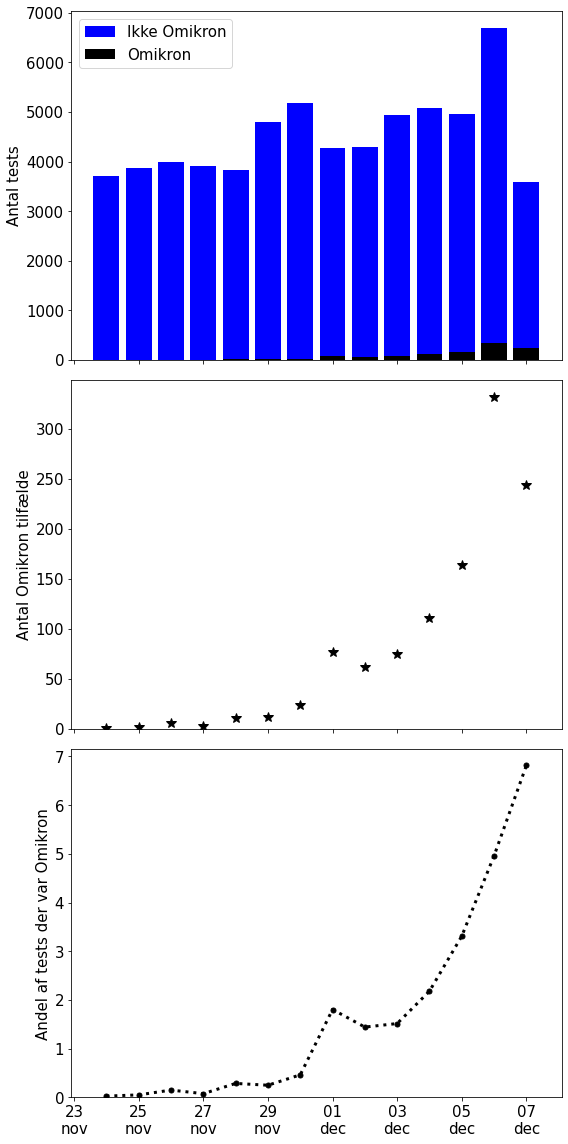

In [25]:

# plt.figure(figsize=(8,8))
# fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8,16))
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,16),sharex=True)

ax1.bar(omdf.Dato,omdf.AntalTest,color='b',label='Ikke Omikron')
ax1.bar(omdf.Dato,omdf.AntalOmikron,color='k',label='Omikron')
ax2.plot(omdf.Dato,omdf.AntalOmikron,'*k')
ax3.plot(omdf.Dato,omdf.Perc,'.:k')
ax1.legend()
ax1.set_ylabel('Antal tests')
ax2.set_ylabel('Antal Omikron tilfælde')
ax3.set_ylabel('Andel af tests der var Omikron')

ax2.set_ylim(bottom=0)
ax3.set_ylim(bottom=0)


ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

# display(omdf.head(4))


plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'OmikronOverblik')

In [26]:
# def expGrowth(t,p):
#     # x0,growthRate = p
#     x0 = p[0]
#     growthRate = p[1]
#     return x0 * np.exp(growthRate*t)
    
# def logiFunc(t,p):
#     x0,growthRate = p    
#     return 1/(1+((1-x0)/x0)*np.exp(-growthRate*t))
    
# def logiFunc100(t,p):
#     x0,growthRate = p
#     K = 100    
#     return K/(1+((K-x0)/x0)*np.exp(-growthRate*t))
def expGrowth(t,x0,a):
    return x0 * np.exp(a*t)
def logiFunc(t,x0,a):
    return 1/(1+((1-x0)/x0)*np.exp(-a*t))
    

In [27]:
# omdf.Ratio.values[0:12]
# popt
# sigma_x0 = np.sqrt(pcov[0,0])
# sigma_a = np.sqrt(pcov[1,1])

In [28]:
# tMax = 50
# startDate = omdf.Dato.min()
# tRange = np.arange(0,tMax)
# dRange = startDate + np.arange(np.timedelta64(0,'D'),np.timedelta64(tMax,'D'))


# x0_0 = 0.001
# a_0 = 0.2
# # p0 = (x0_0,a_0)
# p0 = [x0_0,a_0]


# from scipy.optimize import curve_fit



# # fig,ax1 = plt.subplots()
# fig,(ax1,ax2) = plt.subplots(2,1)

# ax1.plot(omdf.Dato,100*omdf.Ratio,'k*',label='Data')
# ax2.plot(omdf.Dato,100*omdf.Ratio,'k*',label='Data')
# # ax1.plot(dRange,expGrowth(tRange,x0_0,a_0),label='Initial guess')


# lastDataToUse = 12
# yData = omdf.Ratio.values[:lastDataToUse]
# tData = tRange[:lastDataToUse]
# popt,pcov = curve_fit(logiFunc,tData,yData,p0=p0)

# sigma_x0 = np.sqrt(pcov[0,0])
# sigma_a = np.sqrt(pcov[1,1])

# ax1.plot(dRange,100*logiFunc(tRange,popt[0],popt[1]),label='Best fit, all data',color='k')
# ax1.fill_between(dRange,100*logiFunc(tRange,popt[0],popt[1]-2*sigma_a),100*logiFunc(tRange,popt[0],popt[1]+2*sigma_a),color='gray')
# ax2.plot(dRange,100*logiFunc(tRange,popt[0],popt[1]),label='Best fit, all data',color='k')
# ax2.fill_between(dRange,100*logiFunc(tRange,popt[0],popt[1]-2*sigma_a),100*logiFunc(tRange,popt[0],popt[1]+2*sigma_a),color='gray')
# # popt,pcov = curve_fit(expGrowth,tData,yData,p0=p0)
# # ax1.plot(dRange,expGrowth(tRange,popt[0],popt[1]),label='Best fit, all data')

# lastDataToUse = 7
# yData = omdf.Ratio.values[:lastDataToUse]
# tData = tRange[:lastDataToUse]
# popt,pcov = curve_fit(logiFunc,tData,yData,p0=p0)
# sigma_x0 = np.sqrt(pcov[0,0])
# sigma_a = np.sqrt(pcov[1,1])
# ax1.plot(dRange,100*logiFunc(tRange,popt[0],popt[1]),label='Best fit, only start',color='b')
# ax1.fill_between(dRange,100*logiFunc(tRange,popt[0],popt[1]-2*sigma_a),100*logiFunc(tRange,popt[0],popt[1]+2*sigma_a),color='xkcd:light blue',alpha=0.2)
# ax2.plot(dRange,100*logiFunc(tRange,popt[0],popt[1]),label='Best fit, only start',color='b')
# ax2.fill_between(dRange,100*logiFunc(tRange,popt[0],popt[1]-2*sigma_a),100*logiFunc(tRange,popt[0],popt[1]+2*sigma_a),color='xkcd:light blue',alpha=0.2)
# # popt,pcov = curve_fit(expGrowth,tData,yData,p0=p0)
# # ax1.plot(dRange,expGrowth(tRange,popt[0],popt[1]),label='Best fit, only start')


# ax1.set_ylim([0,100])
# ax2.set_ylim([0,10])
# ax1.grid()
# ax2.grid()
# ax1.legend()
# plt.tight_layout()


In [29]:
# # Quick'n'dirty plot
# fig,ax1 = plt.subplots()

# omratio = 100*omdf.AntalOmikron/omdf.AntalTest
# ax1.plot(omdf.Dato,omratio,'*',label='Data, Denmark')

# xRange = np.arange(0,len(omdf))

# # x0 = 0.1
# # a = 0.2
# # expVals = x0 * np.exp(a*xRange)
# # ax1.plot(omdf.Dato,expVals,label=f'{x0}e^({a}t)')
# # # x0 = 0.1
# # a = 0.3
# # expVals = x0 * np.exp(a*xRange)
# # ax1.plot(omdf.Dato,expVals,label=f'{x0}e^({a}t)')

# x0 = 0.1
# a = 0.3
# # expVals = x0 * np.exp(a*xRange)
# expVals = expGrowth(xRange,(x0,a))
# ax1.plot(omdf.Dato,expVals,label=f'{x0}e^({a}t)')
# logiVals = logiFunc100(xRange,(x0,a))
# ax1.plot(omdf.Dato,logiVals,label=f'{x0}e^({a}t)')

# ax1.set_ylim(bottom=0,top=5)
# ax1.legend()

# ax1.set_xlim(right=np.datetime64('2021-12-10'))

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

# # ax1.set_ylim(bottom=0,top=100)
# # ax1.set_xlim(right=np.datetime64('2022-01-10'))

# plt.tight_layout()

# Markov Chain Monte Carlo using pyMCMCSTAT

In [30]:

import pymcmcstat as mc
from pymcmcstat.MCMC import MCMC

%matplotlib widget
%matplotlib widget
print(mc.__version__)

1.9.1


In [31]:
# Make functions for MCMC

# def logiFunc(t,x0,a):
#     return 1/(1+((1-x0)/x0)*np.exp(-a*t))
def logiModel(xdata,theta):
    x0 = theta[0]
    a = theta[1]
    return 1/(1+((1-x0)/x0)*np.exp(-a*xdata))
    # y = a * (xdata**2) + b
    # return y
    
def modelSSfun(theta,data):
    xdata = data.xdata[0]
    ydata = data.ydata[0]
    
    ymodel = logiModel(xdata,theta)
    
    errors = ymodel - ydata
    sse = np.sum(errors**2)
    
    return sse

In [32]:
tMax = 50
startDate = omdf.Dato.min()
tRange = np.arange(0,tMax)
dRange = startDate + np.arange(np.timedelta64(0,'D'),np.timedelta64(tMax,'D'))

chainSamplesToUseForPlots = 3000

# With limited data

In [33]:

maxDataToUse = omdf.AntalOmikron.notna().sum()
lastDataToUse = maxDataToUse - 2
lastDataToUse = maxDataToUse - 1
print(lastDataToUse)
# lastDataToUse = 11
# lastDataToUse = 13
dataY = omdf.Ratio.values[:lastDataToUse]
dataX = tRange[:lastDataToUse]


13


In [34]:
# dir(mc.structures)
mcstat = MCMC()
mcstat.data.add_data_set(dataX,dataY)
mcstat.parameters.add_model_parameter(name='x0',theta0=dataY[0])
mcstat.parameters.add_model_parameter(name='a',theta0=0.2)

mcstat.simulation_options.define_simulation_options(
    nsimu=1.0e3, updatesigma=True
    )
    
# Define model object:
mcstat.model_settings.define_model_settings(
    sos_function=modelSSfun,
)
# Run simulation
mcstat.run_simulation()
# Rerun starting from results of previous run
mcstat.simulation_options.nsimu = int(1.0e5)
mcstat.run_simulation(use_previous_results=True)


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
        x0:  2.69e-04 [     -inf,       inf] N( 0.00e+00,      inf)
         a:      0.20 [     -inf,       inf] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 1000 of 1000 complete in 0.3 sec
Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
        x0:  1.15e-03 [     -inf,       inf] N( 0.00e+00,      inf)
         a:      0.32 [     -inf,       inf] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 100000 of 100000 complete in 35.0 sec

In [35]:
# extract info from results
results = mcstat.simulation_results.results
burnin = int(results['nsimu']/2)
chain = results['chain'][burnin:, :]
s2chain = results['s2chain'][burnin:, :]
names = results['names'] # parameter names

# display chain stats
mcstat.chainstats(chain, results)

from pymcmcstat import mcmcplot as mcp
settings = dict(
    fig=dict(figsize=(7, 6))
)
# # plot chain panel
# mcp.plot_chain_panel(chain, names, settings)
# # plot density panel
# mcp.plot_density_panel(chain, names, settings)
# # pairwise correlation
# f = mcp.plot_pairwise_correlation_panel(chain, names, settings)



------------------------------
      name:      mean       std    MC_err       tau    geweke
        x0:  9.48e-04  3.68e-04  4.72e-06     22.62      0.97
         a:      0.34      0.04  5.74e-04     25.30      1.00
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 16.04%
Stage 2: 49.70%
Net    : 65.75% -> 65745/100000
---------------
Chain provided:
Net    : 66.92% -> 34130/50999
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only provided a subset of the chain,
e.g., removed the first part for burnin-in.
------------------------------


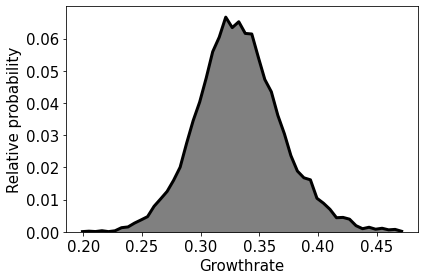

In [36]:
x0_mean = chain[:,0].mean()
a_mean = chain[:,1].mean()
allA = chain[:,1]

# print(f'')
%matplotlib inline

# avalRange = np.arange(allA.min(),allA.max(),100)

# curVals,_ = np.histogram(allA,bins=avalRange)

curVals,curBins = np.histogram(allA,bins=50)

fig,ax1 = plt.subplots()
ax1.plot(curBins[:-1],curVals/sum(curVals),'k')
ax1.fill_between(curBins[:-1],curVals/sum(curVals),color='gray')

ax1.set_ylim(bottom=0)
ax1.set_ylabel('Relative probability')
ax1.set_xlabel('Growthrate')

fig.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'/Omikron/OmikronGrowthRate')

In [37]:
from pymcmcstat import propagation as up

def predmodel(q, data):
    
    xdata = data.xdata[0]
    # evaluate model
    ymodel = logiModel(xdata,q)
    return ymodel

pdata = mcstat.data
# intervals = up.calculate_intervals(chain, results, pdata, predmodel,
#                                   waitbar=True, s2chain=s2chain)


tRange = np.arange(0,tMax)
dRange = startDate + np.arange(np.timedelta64(0,'D'),np.timedelta64(tMax,'D')) 
pdata.xdata[0] = tRange
pdata.ydata[0] = np.nan*np.zeros((tMax,))
pdata.n[0] = tMax
pdata.shape[0] = (tMax,1)
pdata.__dict__

intervals = up.calculate_intervals(chain, results, pdata, predmodel,
                                  waitbar=True, s2chain=s2chain,nsample=chainSamplesToUseForPlots)

 [-----------------100%-----------------] 3000 of 3000 complete in 0.1 sec

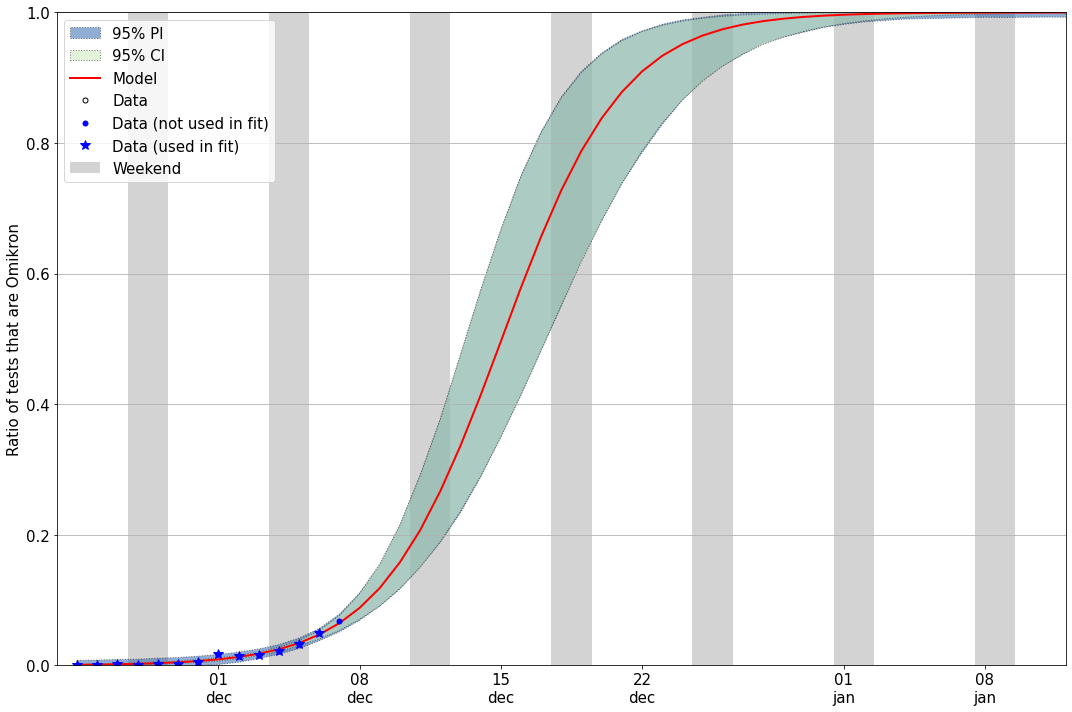

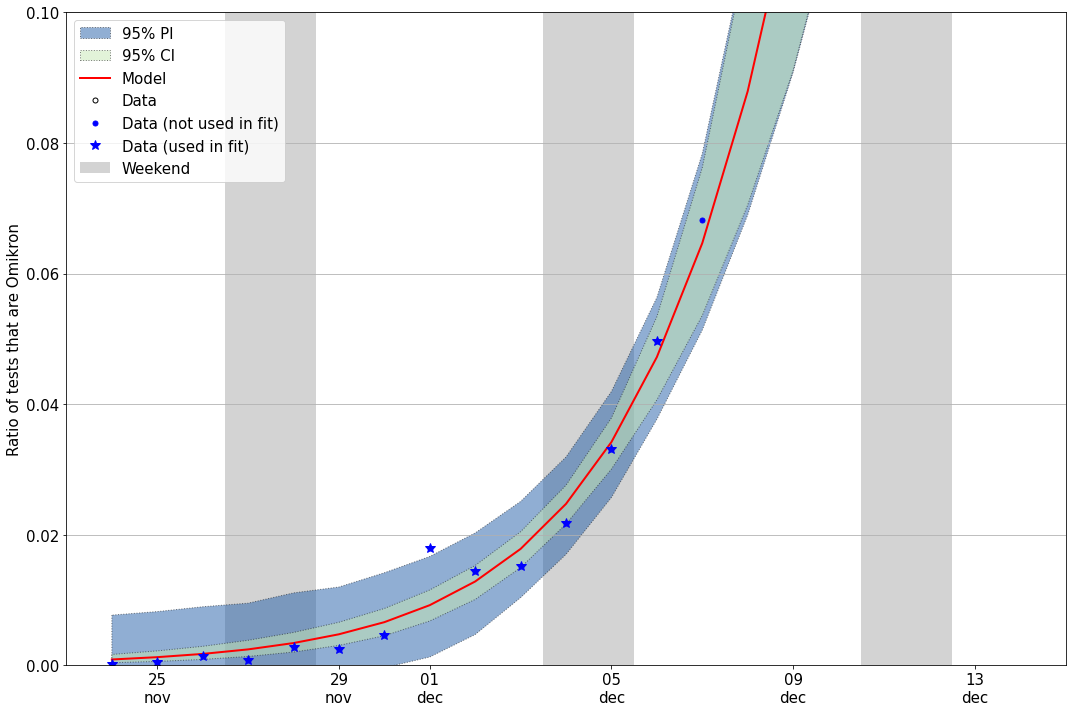

In [38]:
data_display = dict(
    marker='o',
    color='k',
    mfc='none')
    # label='Data')
model_display = dict(
    color='r')
interval_display = dict(
    alpha=0.5)
# tRange = np.arange(0,len(omdf))
# ydata_test = np.arange(0,len(omdf))
fig, ax = up.plot_intervals(intervals,
                            time=dRange,
                            # xdata = pdata.xdata[0],
                            # ydata = pdata.ydata[0],
                            # ydata = ydata_test,
                            ydata=mcstat.data.ydata[0],
                            xdata=mcstat.data.xdata[0],
                            data_display=data_display,
                            model_display=model_display,
                            interval_display=interval_display,
                            ciset=dict(colors=['#c7e9b4']),
                            piset=dict(colors=['#225ea8']),
                            figsize=(15,10))
                  
                            
# ax.plot(dataX,dataY_real,'k.-',label='True model')

ax.plot(omdf.Dato,omdf.Ratio,'b.',label='Data (not used in fit)')
ax.plot(omdf.Dato.values[:lastDataToUse],omdf.Ratio[:lastDataToUse],'b*',label='Data (used in fit)')

# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 60
for k in range(-numWeeks,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')


ax.set_xlim(left=omdf.Dato.min()-np.timedelta64(1,'D'),right=dRange[-1])
# ax.set_yticks(np.arange(0,1.01,10))
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.legend(loc='upper left')
ax.set_ylim([0,1])
ax.grid(axis='y')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax.set_ylabel('Ratio of tests that are Omikron')
fig.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'/Omikron/OmikronLogisticFitMCMC')

fig, ax = up.plot_intervals(intervals,
                            time=dRange,
                            # xdata = pdata.xdata[0],
                            # ydata = pdata.ydata[0],
                            # ydata = ydata_test,
                            ydata=mcstat.data.ydata[0],
                            xdata=mcstat.data.xdata[0],
                            data_display=data_display,
                            model_display=model_display,
                            interval_display=interval_display,
                            ciset=dict(colors=['#c7e9b4']),
                            piset=dict(colors=['#225ea8']),
                            figsize=(15,10))
                  
                            
# ax.plot(mcstat.data.xdata[0],mcstat.data.ydata[0],'k.-',label='Data')


ax.plot(omdf.Dato,omdf.Ratio,'b.',label='Data (not used in fit)')
ax.plot(omdf.Dato.values[:lastDataToUse],omdf.Ratio[:lastDataToUse],'b*',label='Data (used in fit)')


# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 60
for k in range(-numWeeks,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')


# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.legend(loc='upper left')
ax.set_ylim([0,0.1])
ax.set_xlim(left=omdf.Dato.min()-np.timedelta64(1,'D'),right=omdf.Dato.max())


ax.grid(axis='y')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax.set_ylabel('Ratio of tests that are Omikron')
fig.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'/Omikron/OmikronLogisticFitMCMC_zoom')

# With all data

In [39]:

maxDataToUse = omdf.AntalOmikron.notna().sum()
lastDataToUse = maxDataToUse
# lastDataToUse = maxDataToUse - 2
print(lastDataToUse)
dataY = omdf.Ratio.values[:lastDataToUse]
dataX = tRange[:lastDataToUse]


14


In [40]:
# dir(mc.structures)
mcstat = MCMC()
mcstat.data.add_data_set(dataX,dataY)
mcstat.parameters.add_model_parameter(name='x0',theta0=dataY[0])
mcstat.parameters.add_model_parameter(name='a',theta0=0.2)

mcstat.simulation_options.define_simulation_options(
    nsimu=1.0e3, updatesigma=True
    )
    
# Define model object:
mcstat.model_settings.define_model_settings(
    sos_function=modelSSfun,
)
# Run simulation
mcstat.run_simulation()
# Rerun starting from results of previous run
mcstat.simulation_options.nsimu = int(1.0e5)
mcstat.run_simulation(use_previous_results=True)


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
        x0:  2.69e-04 [     -inf,       inf] N( 0.00e+00,      inf)
         a:      0.20 [     -inf,       inf] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 1000 of 1000 complete in 0.3 sec
Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
        x0:  9.60e-04 [     -inf,       inf] N( 0.00e+00,      inf)
         a:      0.33 [     -inf,       inf] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 100000 of 100000 complete in 35.0 sec

In [41]:
# extract info from results
results = mcstat.simulation_results.results
burnin = int(results['nsimu']/2)
chain = results['chain'][burnin:, :]
s2chain = results['s2chain'][burnin:, :]
names = results['names'] # parameter names

# display chain stats
mcstat.chainstats(chain, results)

from pymcmcstat import mcmcplot as mcp
settings = dict(
    fig=dict(figsize=(7, 6))
)
# # plot chain panel
# mcp.plot_chain_panel(chain, names, settings)
# # plot density panel
# mcp.plot_density_panel(chain, names, settings)
# # pairwise correlation
# f = mcp.plot_pairwise_correlation_panel(chain, names, settings)



------------------------------
      name:      mean       std    MC_err       tau    geweke
        x0:  8.34e-04  2.56e-04  6.95e-06     20.86      0.94
         a:      0.35      0.03  6.96e-04     20.44      0.98
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 17.88%
Stage 2: 51.51%
Net    : 69.39% -> 69393/100000
---------------
Chain provided:
Net    : 70.10% -> 35749/50999
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only provided a subset of the chain,
e.g., removed the first part for burnin-in.
------------------------------


14

In [48]:
from pymcmcstat import propagation as up

def predmodel(q, data):
    
    xdata = data.xdata[0]
    # evaluate model
    ymodel = logiModel(xdata,q)
    return ymodel

# pdata = mcstat.data.copy()
# # intervals = up.calculate_intervals(chain, results, pdata, predmodel,
# #                                   waitbar=True, s2chain=s2chain)



yDataProp = np.nan*np.zeros((tMax,))
curNumData = len(mcstat.data.ydata[0])
yDataProp[:curNumData] = mcstat.data.ydata[0].reshape((curNumData,))
tRange = np.arange(0,tMax)
dRange = startDate + np.arange(np.timedelta64(0,'D'),np.timedelta64(tMax,'D')) 
pdata.xdata[0] = tRange
pdata.ydata[0] = yDataProp
pdata.n[0] = tMax
pdata.shape[0] = (tMax,1)
pdata.__dict__


mcstatProp = MCMC()
mcstatProp.data.add_data_set(dRange,yDataProp)


# intervals = up.calculate_intervals(chain, results, pdata, predmodel,
#                                   waitbar=True, s2chain=s2chain,nsample=chainSamplesToUseForPlots)
intervals = up.calculate_intervals(chain, results, pdata, predmodel,
                                  waitbar=True, s2chain=s2chain,nsample=chainSamplesToUseForPlots)

 [-----------------100%-----------------] 3000 of 3000 complete in 0.1 sec

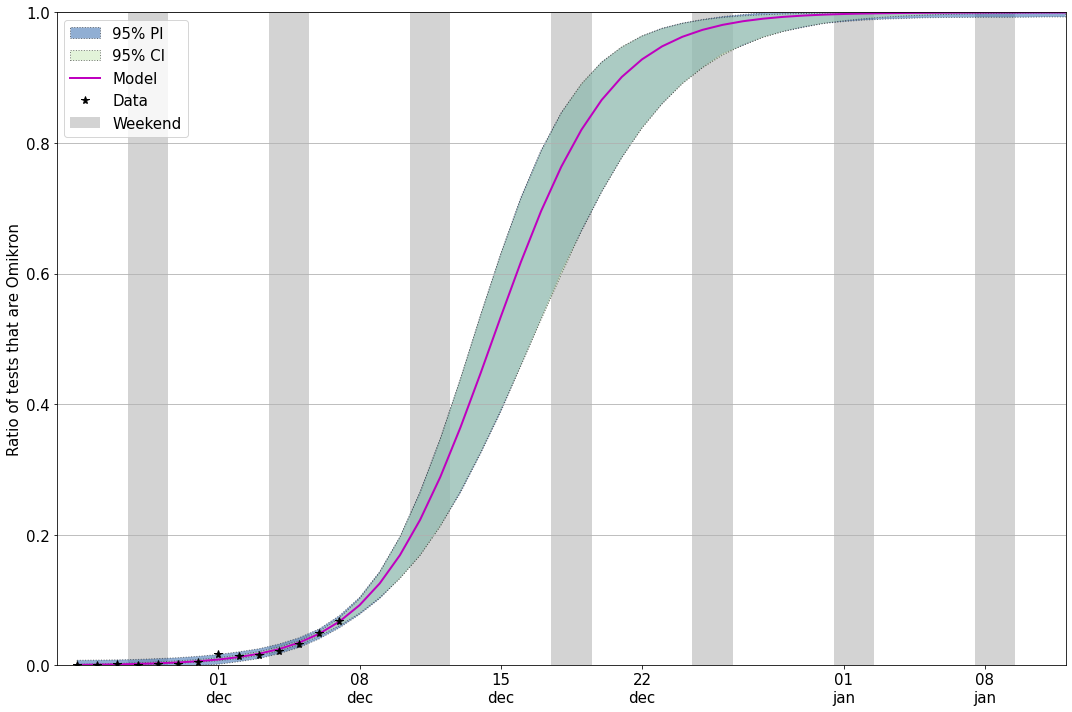

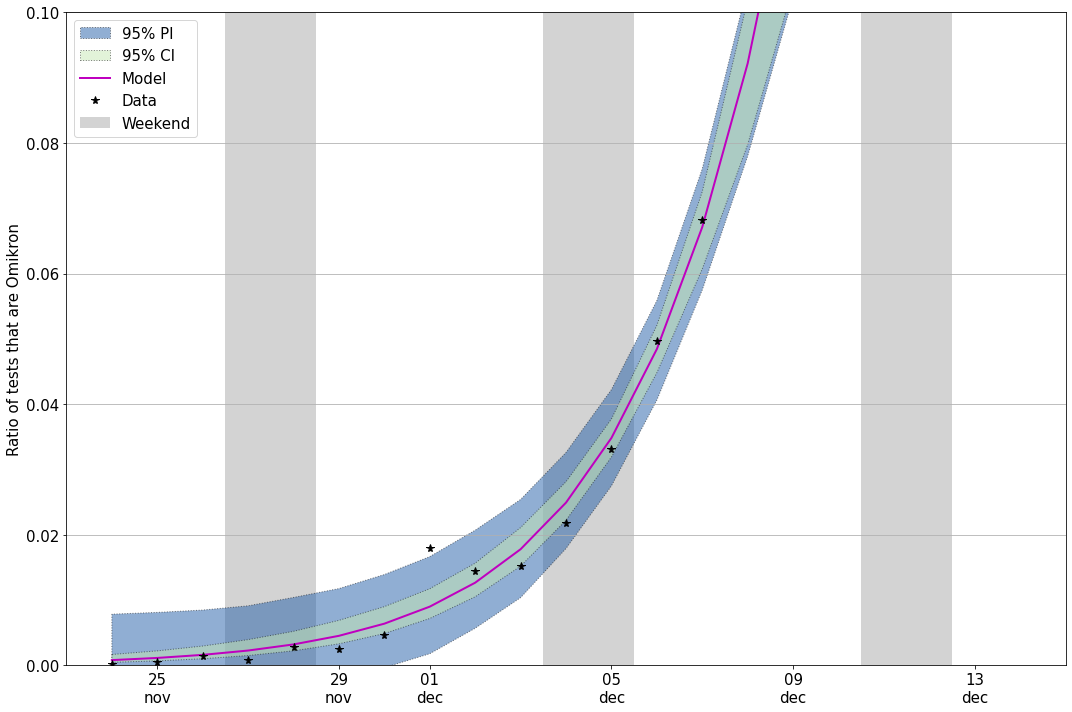

In [54]:
data_display = dict(
    marker='*',
    color='k',
    # mfc='none',
    markersize=8,
    label='Data')
    # label='Data (used in fit)')
model_display = dict(
    color='m')
interval_display = dict(
    alpha=0.5)
    
fig, ax = up.plot_intervals(intervals,
                            time=dRange,
                            ydata=mcstatProp.data.ydata[0],
                            xdata=mcstatProp.data.xdata[0],
                            data_display=data_display,
                            model_display=model_display,
                            interval_display=interval_display,
                            ciset=dict(colors=['#c7e9b4']),
                            piset=dict(colors=['#225ea8']),
                            figsize=(15,10))
                  
                            
# ax.plot(omdf.Dato,omdf.Ratio,'k.',markersize=6,label='Data (not used in fit)')


# ax.plot(omdf.Dato.values[:lastDataToUse],omdf.Ratio[:lastDataToUse],'b*',label='Data (used in fit)')

# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 60
for k in range(-numWeeks,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')


ax.set_xlim(left=omdf.Dato.min()-np.timedelta64(1,'D'),right=dRange[-1])
# ax.set_yticks(np.arange(0,1.01,10))
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1.01, 0.25,0.9,0.5), loc='center left')

ax.legend(loc='upper left')
ax.set_ylim([0,1])
ax.grid(axis='y')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax.set_ylabel('Ratio of tests that are Omikron')




fig.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'/Omikron/OmikronLogisticFitMCMC_allData')

fig, ax = up.plot_intervals(intervals,
                            time=dRange,
                            # xdata = pdata.xdata[0],
                            # ydata = pdata.ydata[0],
                            # ydata = ydata_test,
                            ydata=mcstatProp.data.ydata[0],
                            xdata=mcstatProp.data.xdata[0],
                            data_display=data_display,
                            model_display=model_display,
                            interval_display=interval_display,
                            ciset=dict(colors=['#c7e9b4']),
                            piset=dict(colors=['#225ea8']),
                            figsize=(15,10))
                  
                            
# ax.plot(mcstat.data.xdata[0],mcstat.data.ydata[0],'k.-',label='Data')
# Draw weekends
firstSunday = np.datetime64('2021-01-03')
numWeeks = 60
for k in range(-numWeeks,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')


# ax.plot(omdf.Dato,omdf.Ratio,'k.',markersize=6,label='Data (not used in fit)')

# # ax.plot(omdf.Dato,omdf.Ratio,'b.',label='Data (not used in fit)')
# ax.plot(omdf.Dato.values[:lastDataToUse],omdf.Ratio[:lastDataToUse],'b*',label='Data (used in fit)')

# ax.legend(bbox_to_anchor=(1.01, 0.25,0.9,0.5), loc='center left')
ax.legend(loc='upper left')
ax.set_ylim([0,0.1])
ax.set_xlim(left=omdf.Dato.min()-np.timedelta64(1,'D'),right=omdf.Dato.max())


ax.grid(axis='y')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax.set_ylabel('Ratio of tests that are Omikron')
fig.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'/Omikron/OmikronLogisticFitMCMC_allData_zoom')

In [53]:
# data_display = dict(
#     marker='*',
#     color='k',
#     # mfc='none',
#     markersize=8,
#     label='Data (used in fit)')
# model_display = dict(
#     color='m')
# interval_display = dict(
#     alpha=0.5)
    
# fig, ax = up.plot_intervals(intervals,
#                             time=dRange,
#                             ydata=mcstatProp.data.ydata[0],
#                             xdata=mcstatProp.data.xdata[0],
#                             data_display=data_display,
#                             model_display=model_display,
#                             interval_display=interval_display,
#                             ciset=dict(colors=['#c7e9b4']),
#                             piset=dict(colors=['#225ea8']),
#                             figsize=(15,10))
                  
                            
# # ax.plot(omdf.Dato,omdf.Ratio,'k.',markersize=6,label='Data (not used in fit)')


# # ax.plot(omdf.Dato.values[:lastDataToUse],omdf.Ratio[:lastDataToUse],'b*',label='Data (used in fit)')

# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 60
# for k in range(-numWeeks,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')


# ax.set_xlim(left=omdf.Dato.min()-np.timedelta64(1,'D'),right=dRange[-1])
# # ax.set_yticks(np.arange(0,1.01,10))
# # ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# # ax.legend(bbox_to_anchor=(1.01, 0.25,0.9,0.5), loc='center left')

# ax.legend(loc='upper left')
# ax.set_ylim([0,1])
# ax.grid(axis='y')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax.set_ylabel('Ratio of tests that are Omikron')




# fig.tight_layout()

# if saveFigures:
#     plt.savefig(path_figs+'/Omikron/OmikronLogisticFitMCMC_allData')

# fig, ax = up.plot_intervals(intervals,
#                             time=dRange,
#                             ydata=mcstatProp.data.ydata[0],
#                             xdata=mcstatProp.data.xdata[0],
#                             data_display=data_display,
#                             model_display=model_display,
#                             interval_display=interval_display,
#                             ciset=dict(colors=['#c7e9b4']),
#                             piset=dict(colors=['#225ea8']),
#                             figsize=(15,10))
               

# # ax.plot(omdf.Dato,omdf.Ratio,'k.',markersize=6,label='Data (not used in fit)')
   
                            
# # ax.plot(mcstat.data.xdata[0],mcstat.data.ydata[0],'k.-',label='Data')
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 60
# for k in range(-numWeeks,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')

# # # ax.plot(omdf.Dato,omdf.Ratio,'b.',label='Data (not used in fit)')
# # ax.plot(omdf.Dato.values[:lastDataToUse],omdf.Ratio[:lastDataToUse],'b*',label='Data (used in fit)')

# # ax.legend(bbox_to_anchor=(1.01, 0.25,0.9,0.5), loc='center left')
# ax.legend(loc='upper left')
# ax.set_ylim([0,0.1])
# ax.set_xlim(left=omdf.Dato.min()-np.timedelta64(1,'D'),right=omdf.Dato.max())


# ax.grid(axis='y')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax.set_ylabel('Ratio of tests that are Omikron')
# fig.tight_layout()

# if saveFigures:
#     plt.savefig(path_figs+'/Omikron/OmikronLogisticFitMCMC_allData_zoom')

# Systematically do the same thing, but with more and more data